In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import gc


Mounted at /content/drive


In [ ]:
# Load the dataset
file_path = '/content/drive/My Drive/Dataset/tweets.csv'
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Define column headers
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

# Check the dataset
print("Dataset Head:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nClass Balance (Sentiment Labels):")
print(df['target'].value_counts())


Dataset Head:
   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype

In [ ]:
nltk.download('stopwords')

# Text Cleaning Function
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    return text

# Apply text cleaning
df['cleaned_text'] = df['text'].apply(clean_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Stemming
stemmer = SnowballStemmer("english")
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Check cleaned text
print("\nCleaned Text Sample:")
print(df[['text', 'cleaned_text']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Cleaned Text Sample:
                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text  
0  switchfoot bummer shoulda got david carr third...  
1  upset updat facebook text might cri result sch...  
2  kenichan dive mani time ball manag save 50 res...  
3                    whole bodi feel itchi like fire  
4                      nationwideclass behav mad see  


In [ ]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Define target labels
y = df['target']

# Train-Test Split
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(tfidf_features, y, test_size=0.2, random_state=42)

print("\nTF-IDF Train and Test Shapes:")
print("X_train_tfidf:", X_train_tfidf.shape)
print("X_test_tfidf:", X_test_tfidf.shape)



TF-IDF Train and Test Shapes:
X_train_tfidf: (1280000, 5000)
X_test_tfidf: (320000, 5000)


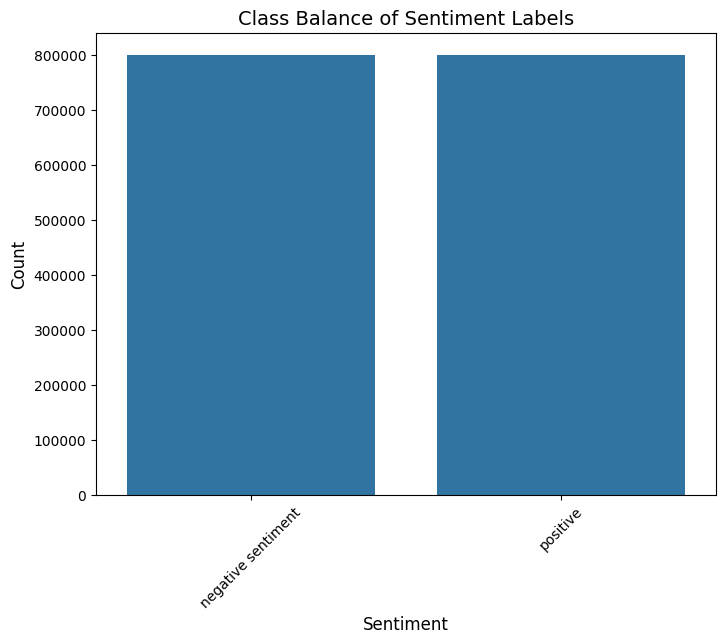

In [ ]:
# Bar Chart for Class Balance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x=df['target'].map({0: 'negative sentiment', 2: 'neutral', 4: 'positive'}))
plt.title('Class Balance of Sentiment Labels', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
pip install WordCloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 7.4 MB/s eta 0:00:00


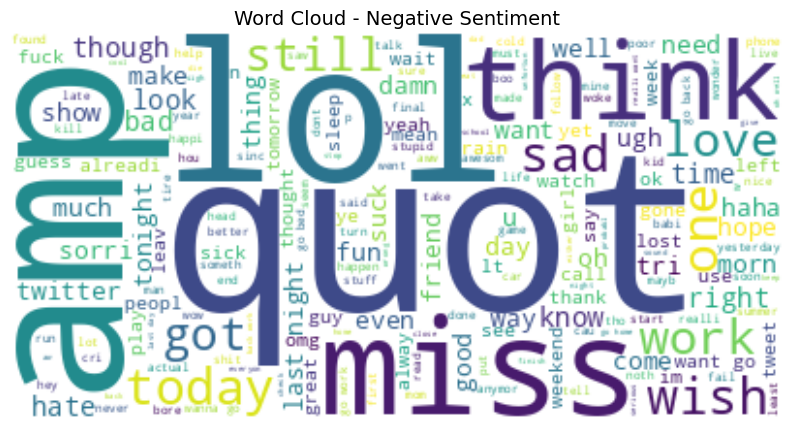

In [ ]:
# Word Cloud for Negative Sentiment
from wordcloud import WordCloud

negative_text = " ".join(df[df['target'] == 0]['cleaned_text'])  # Subset for negative sentiment
negative_wordcloud = WordCloud(width=400, height=200, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Negative Sentiment', fontsize=14)
plt.axis('off')
plt.show()


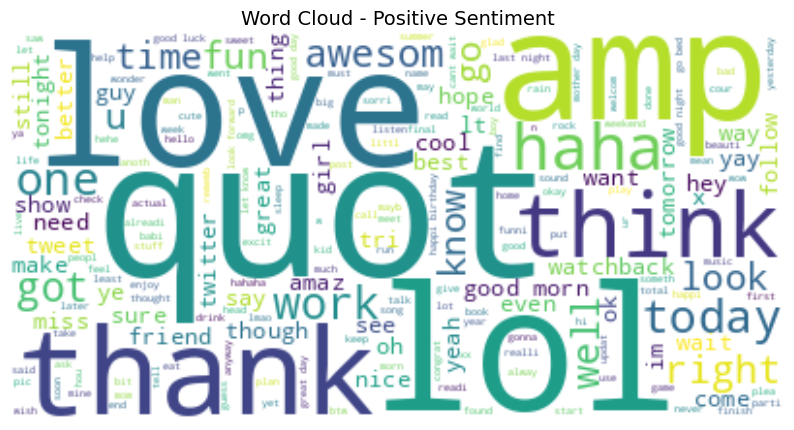

In [ ]:
# Word Cloud for Positive Sentiment
positive_text = " ".join(df[df['target'] == 4]['cleaned_text'])  # Subset for positive sentiment
positive_wordcloud = WordCloud(width=400, height=200, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Positive Sentiment', fontsize=14)
plt.axis('off')
plt.show()


In [ ]:
print(df['target'].value_counts())


target
0    800000
4    800000
Name: count, dtype: int64


<ipython-input-18-74cd364cd39b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


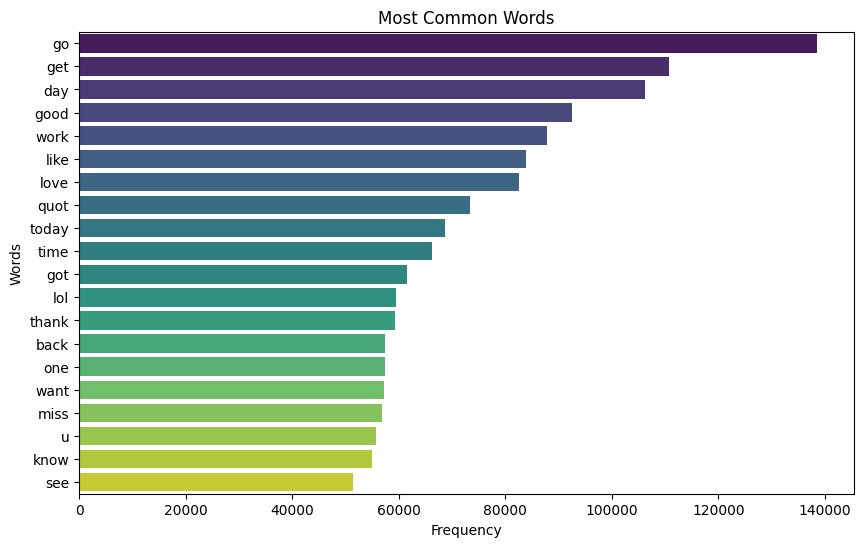

In [ ]:
from collections import Counter

# Get all words from the cleaned text
all_words = " ".join(df['cleaned_text']).split()

# Count word frequencies
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)

# Create a bar plot of the most common words
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words, palette='viridis')
plt.title('Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


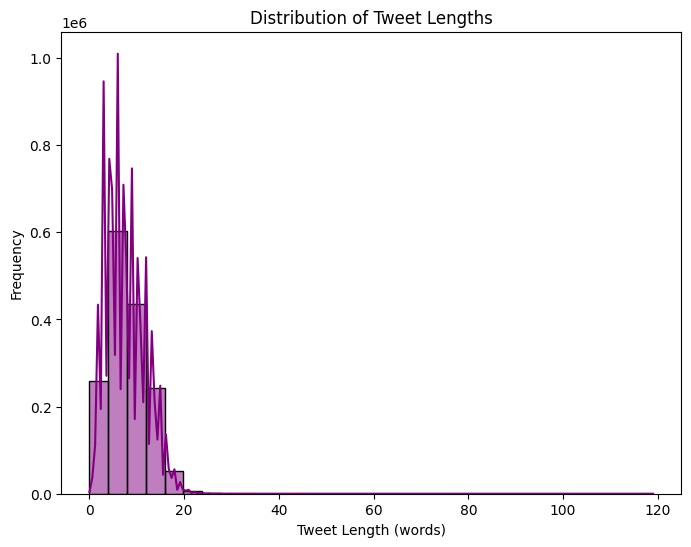

In [ ]:
# Calculate tweet lengths
df['tweet_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))

# Plot the distribution of tweet lengths
plt.figure(figsize=(8, 6))
sns.histplot(df['tweet_length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (words)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-20-b5b54c501c94>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['target'].map({0: 'Negative', 2: 'Neutral', 4: 'Positive'}),


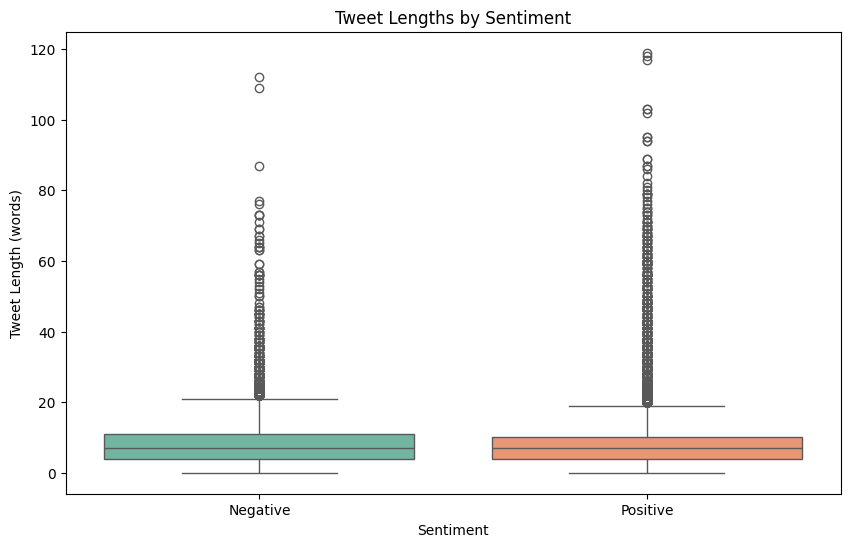

In [ ]:
# Plot tweet length distributions by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['target'].map({0: 'Negative', 2: 'Neutral', 4: 'Positive'}),
            y=df['tweet_length'], palette='Set2')
plt.title('Tweet Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length (words)')
plt.show()


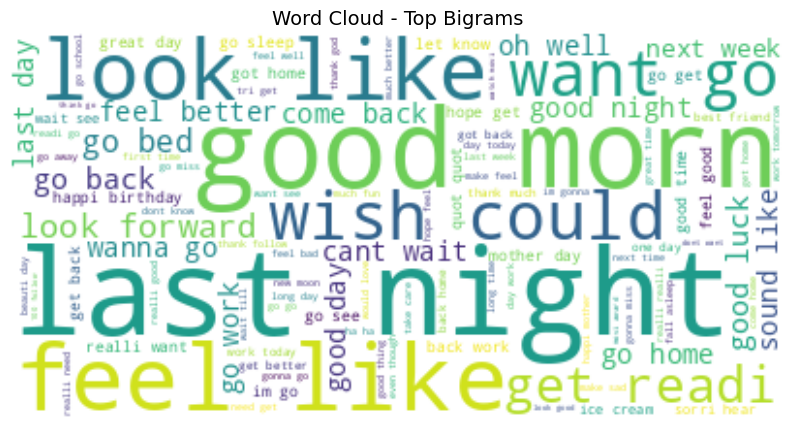

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Generate bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=100)
bigrams = vectorizer.fit_transform(df['cleaned_text'])
bigram_freq = dict(zip(vectorizer.get_feature_names_out(), bigrams.toarray().sum(axis=0)))

# Create a word cloud for bigrams
bigram_wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(bigram_freq)

plt.figure(figsize=(10, 6))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Top Bigrams', fontsize=14)
plt.axis('off')
plt.show()


<ipython-input-22-662442f878c7>:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


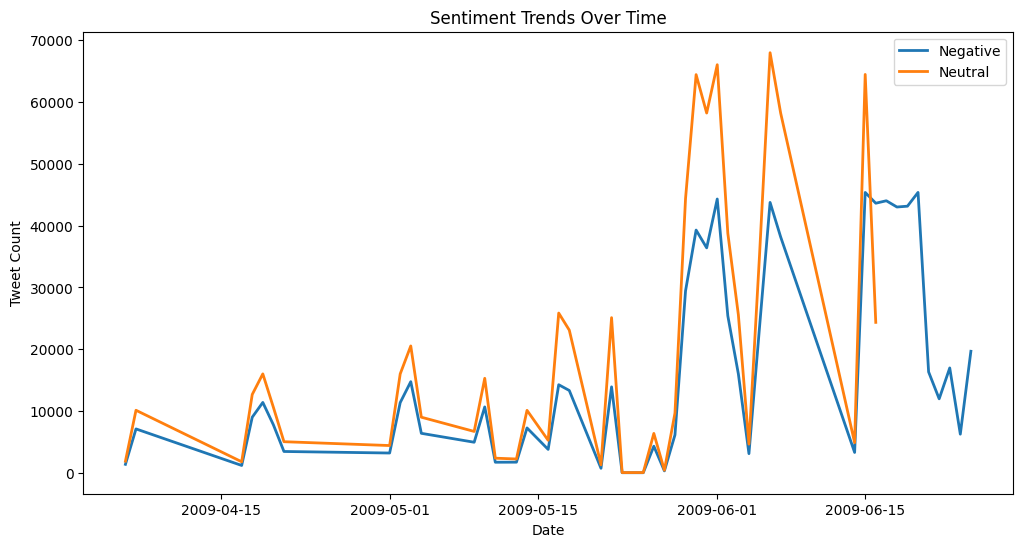

In [ ]:
# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Group by date and sentiment
sentiment_trends = df.groupby([df['date'].dt.date, 'target']).size().unstack()

# Plot sentiment trends over time
plt.figure(figsize=(12, 6))
sentiment_trends.plot(ax=plt.gca(), linewidth=2)
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.legend(['Negative', 'Neutral', 'Positive'])
plt.show()

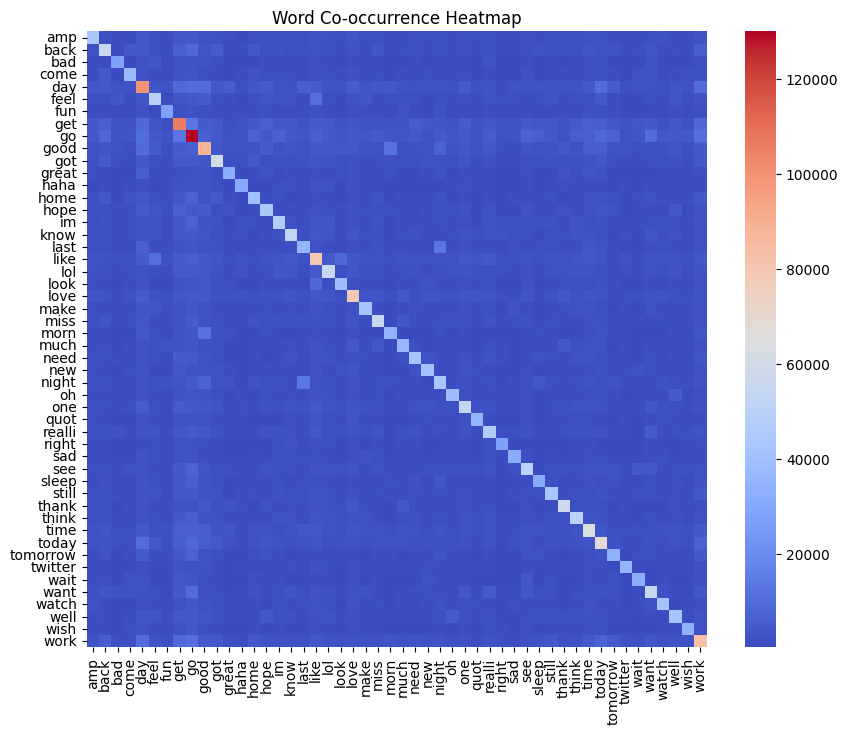

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Generate co-occurrence matrix
vectorizer = CountVectorizer(max_features=50, binary=True)
co_occurrence = (vectorizer.fit_transform(df['cleaned_text']).T * vectorizer.fit_transform(df['cleaned_text'])).toarray()
words = vectorizer.get_feature_names_out()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence, xticklabels=words, yticklabels=words, cmap='coolwarm', annot=False)
plt.title('Word Co-occurrence Heatmap')
plt.show()